In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [4]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1357.jpg', 'with_mask_2213.jpg', 'with_mask_297.jpg', 'with_mask_2795.jpg', 'with_mask_3296.jpg']
['with_mask_892.jpg', 'with_mask_1663.jpg', 'with_mask_2395.jpg', 'with_mask_1796.jpg', 'with_mask_121.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_624.jpg', 'without_mask_1831.jpg', 'without_mask_3054.jpg', 'without_mask_2199.jpg', 'without_mask_1063.jpg']
['without_mask_2757.jpg', 'without_mask_1779.jpg', 'without_mask_2148.jpg', 'without_mask_623.jpg', 'without_mask_3185.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


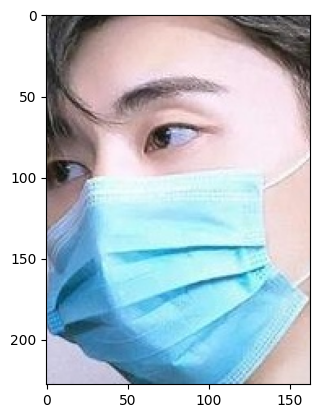

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

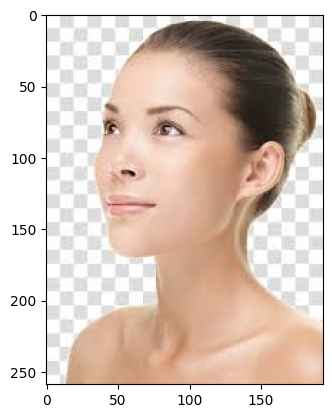

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[197, 195, 196],
        [  6,   4,   5],
        [ 13,  11,  12],
        ...,
        [ 44,  26,  27],
        [ 59,  43,  47],
        [ 64,  49,  56]],

       [[197, 195, 196],
        [  4,   2,   3],
        [ 13,  11,  12],
        ...,
        [ 34,  18,  18],
        [ 45,  31,  34],
        [ 64,  52,  58]],

       [[197, 195, 196],
        [  3,   2,   2],
        [ 12,  10,  11],
        ...,
        [ 32,  18,  18],
        [ 29,  18,  20],
        [ 74,  63,  69]]], dtype=uint8)
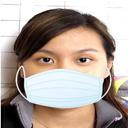

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[177, 160, 168],
        [169, 152, 160],
        [153, 136, 144],
        ...,
        [ 92,  59,  54],
        [ 91,  58,  53],
        [ 91,  58,  53]],

       [[148, 131, 139],
        [138, 121, 129],
        [117, 100, 108],
        ...,
        [ 93,  60,  54],
        [ 92,  59,  53],
        [ 92,  59,  53]],

       [[118, 101, 109],
        [105,  88,  96],
        [ 78,  63,  70],
        ...,
        [ 94,  61,  54],
        [ 93,  60,  53],
        [ 93,  60,  53]],

       ...,

       [[ 28,  21,  28],
        [ 29,  21,  28],
        [ 30,  22,  27],
        ...,
        [ 24,  19,  24],
        [ 25,  19,  25],
        [ 25,  19,  26]],

       [[ 31,  23,  28],
        [ 31,  22,  28],
        [ 31,  22,  26],
        ...,
        [ 32,  22,  25],
        [ 31,  21,  24],
        [ 31,  21,  25]],

       [[ 33,  24,  29],
        [ 33,  23,  28],
        [ 32,  22,  26],
        ...,
        [ 37,  24,  25],
        [ 35,  23,  24],
        [ 35,  22,  24]]], dtype=uint8)
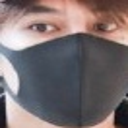

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.69411765, 0.62745098, 0.65882353],
        [0.6627451 , 0.59607843, 0.62745098],
        [0.6       , 0.53333333, 0.56470588],
        ...,
        [0.36078431, 0.23137255, 0.21176471],
        [0.35686275, 0.22745098, 0.20784314],
        [0.35686275, 0.22745098, 0.20784314]],

       [[0.58039216, 0.51372549, 0.54509804],
        [0.54117647, 0.4745098 , 0.50588235],
        [0.45882353, 0.39215686, 0.42352941],
        ...,
        [0.36470588, 0.23529412, 0.21176471],
        [0.36078431, 0.23137255, 0.20784314],
        [0.36078431, 0.23137255, 0.20784314]],

       [[0.4627451 , 0.39607843, 0.42745098],
        [0.41176471, 0.34509804, 0.37647059],
        [0.30588235, 0.24705882, 0.2745098 ],
        ...,
        [0.36862745, 0.23921569, 0.21176471],
        [0.36470588, 0.23529412, 0.20784314],
        [0.36470588, 0.23529412, 0.20784314]],

       ...,

       [[0.10980392, 0.08235294, 0.10980392],
        [0.11372549, 0.08235294, 0.10980392],
        [0.11764706, 0

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 829ms/step - acc: 0.6738 - loss: 0.7103 - val_acc: 0.8810 - val_loss: 0.2835
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 815ms/step - acc: 0.8851 - loss: 0.3007 - val_acc: 0.8992 - val_loss: 0.2420
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 813ms/step - acc: 0.8944 - loss: 0.2586 - val_acc: 0.9174 - val_loss: 0.2135
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 813ms/step - acc: 0.9324 - loss: 0.1940 - val_acc: 0.9074 - val_loss: 0.2425
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 817ms/step - acc: 0.9304 - loss: 0.1798 - val_acc: 0.9289 - val_loss: 0.2056


In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - acc: 0.9047 - loss: 0.2211
Test Accuracy = 0.9205824136734009


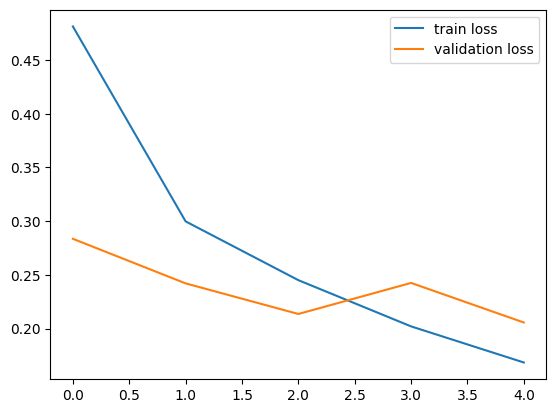

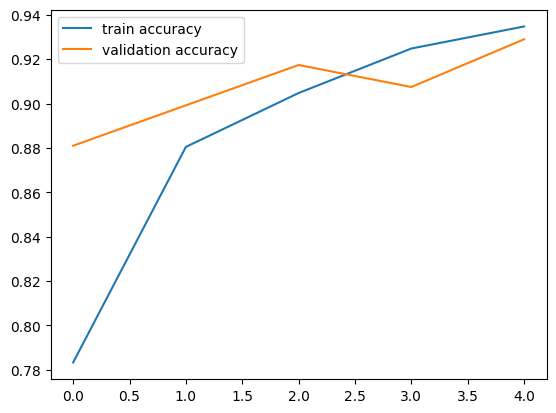

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [56]:
from google.colab import files
uploaded = files.upload()

Saving Tay1.jpeg to Tay1.jpeg


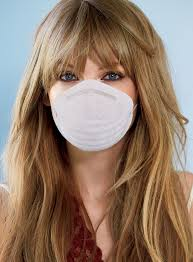

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.4387137 0.5014176]]
1
The person in the image is wearing a mask


In [57]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

input_image_path = 'Tay1.jpeg'

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

In [58]:
from google.colab import files
uploaded = files.upload()

Saving JB.jpg to JB.jpg


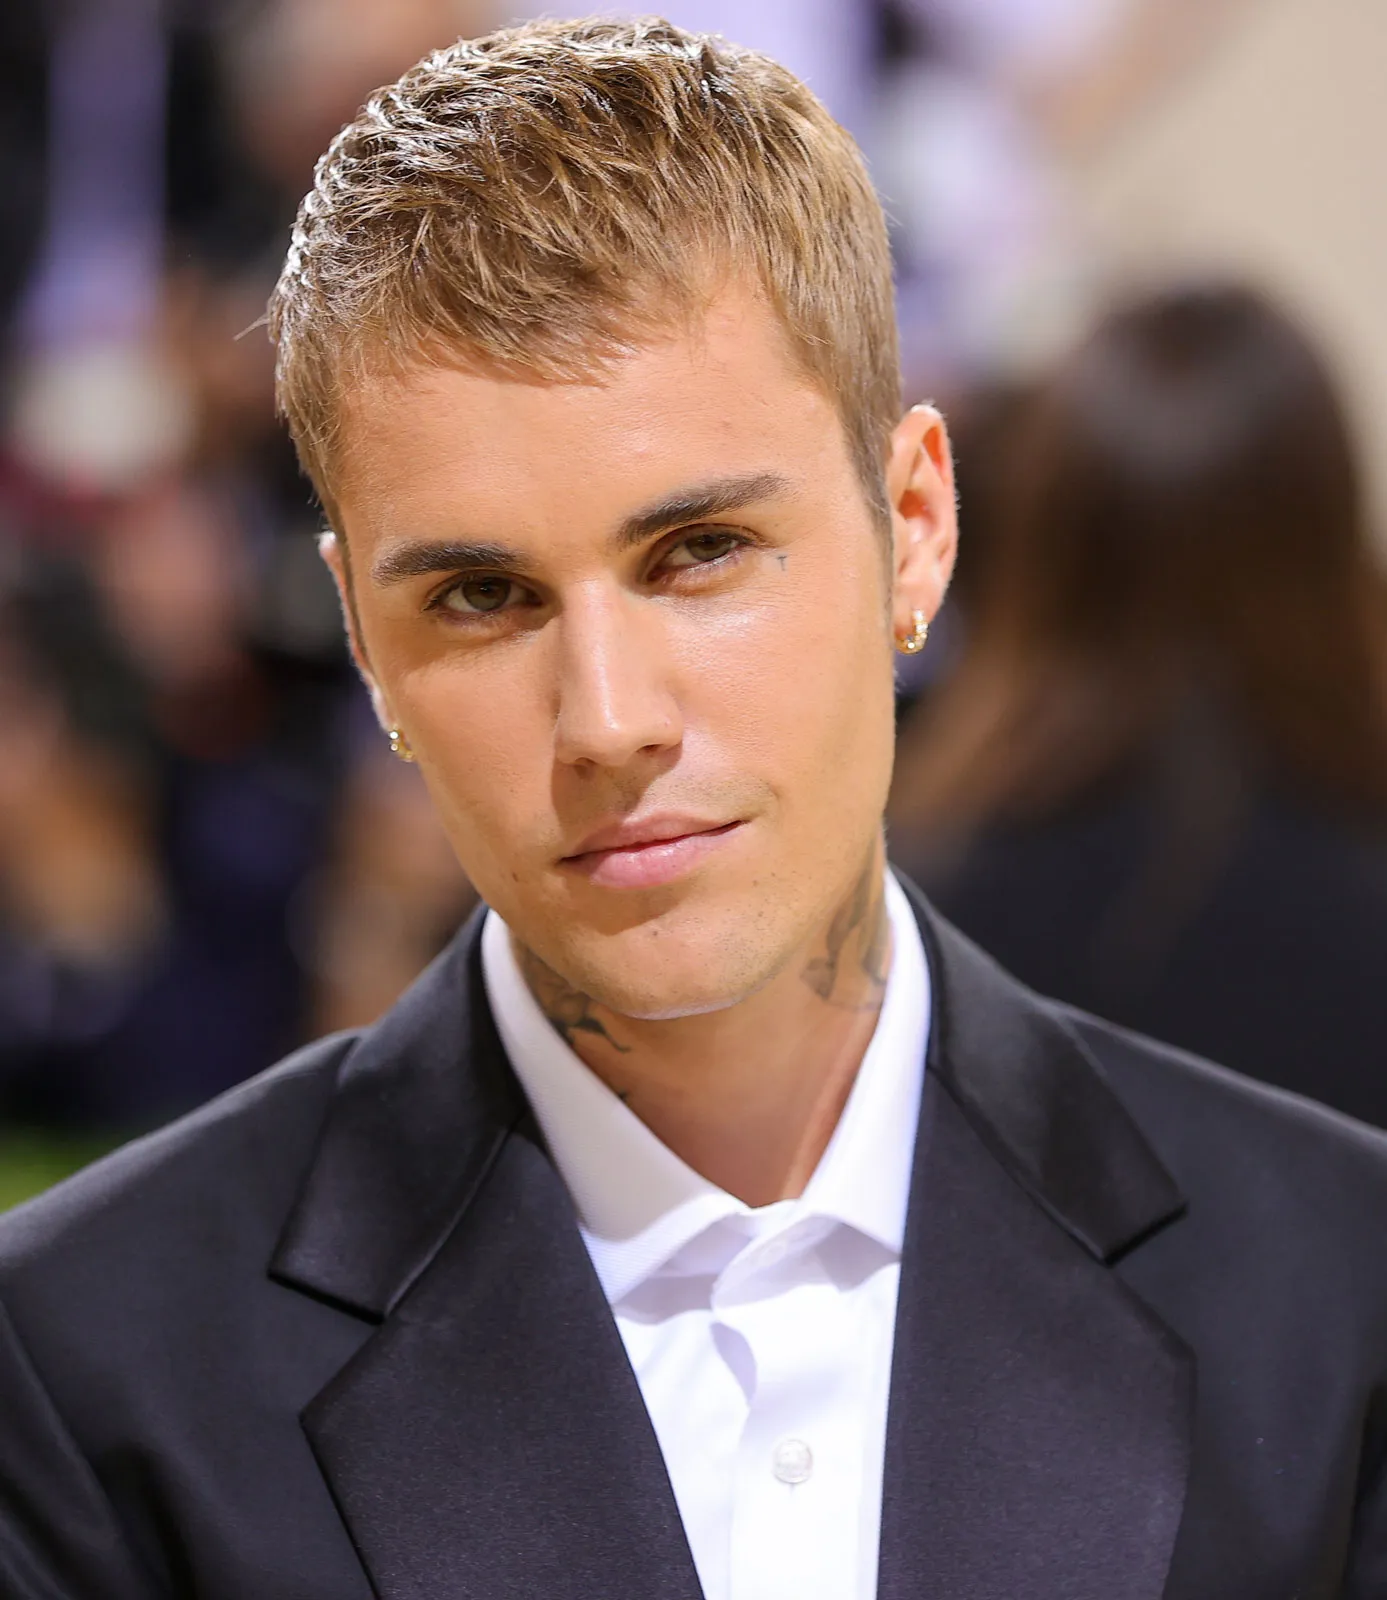

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.541116  0.4408129]]
0
The person in the image is not wearing a mask


In [59]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

input_image_path = 'JB.jpg'

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')